## Question 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

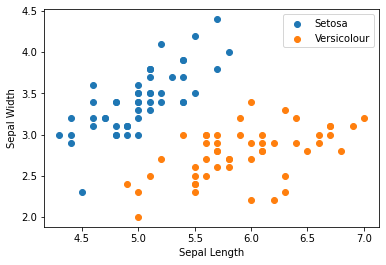

In [2]:
df = px.data.iris()

df1 = df[df['species'] == 'setosa']
df2 = df[df['species'] == 'versicolor']

plt.scatter(x = df1['sepal_length'], y = df1['sepal_width'], label= 'Setosa')
plt.scatter(x = df2['sepal_length'], y = df2['sepal_width'], label= 'Versicolour')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [17]:
# Function to predict value, given x, y, w and b
def predict(x, w, b):
    # if <w,x> if greater than b -> 1, otherwise -> 0
    f = np.dot(w, x)
    if f >= b:
        return 1
    else:
        return 0

# Function to train the model
def train_perceptron(x, y, epochs, lr):
    # initialize the bias parameter and the weights
    b = 0
    n_features = X_train.shape[1]
    w = np.zeros((n_features))

    #for all epochs
    for epoch in range(epochs):
        for i in range(len(x)):  
            y_pred = predict(x[i], w, b)

            # updating the weights
            for k in range(len(w)):             
                w[k] = w[k] + lr * (y[i]-y_pred) * x[i][k]
                b = b + lr * (y[i]-y_pred)
    return (w, b)

def linear_kernel(x, xi):
    # x is the vector of weights
    # xi is the sample
    return np.dot(x, xi)

# Function to test the model
def test_perceptron(x, y, w, b):
    y_pred = []
    n_correct = 0
    n_sample = x.shape[0]
    for i in range(n_sample):
        f = linear_kernel(w, x[i])

        # activation function
        if f >= b:                               
            yhat = 1                             
        else:                                   
            yhat = 0
        if yhat == y[i]:
            n_correct += 1
        
        y_pred.append(yhat)
    accuracy = 100 * n_correct/n_sample
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy, y_pred

In [18]:
from sklearn.model_selection import train_test_split
df1 = df[(df['species'] == 'setosa') | (df['species'] == 'versicolor')].reset_index(drop=True)

X = np.array(df1[['sepal_length', 'sepal_width']])
y = np.array(df1['species'].map({"setosa": 1, "versicolor": 0}))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [26]:
w, b = train_perceptron(X_train, y_train, epochs= 1000, lr= 10**-9)

print("Weights:")
print(w)

print("Bias:")
print(b)

#%% Test on testset
# Now, test the model with new data
print("Accuracy testset:")
acc, y_pred = test_perceptron(X_test, y_test, w, b)

Weights:
[-4.8e-09  8.8e-09]
Bias:
2e-09
Accuracy testset:
Accuracy: 98.75%


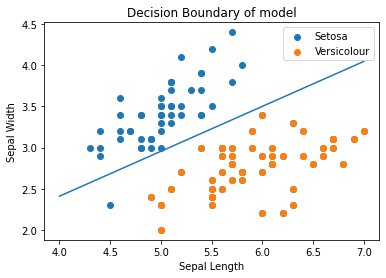

In [22]:
x_points = np.linspace(4,7,500)
y_ = -(w[0]*x_points - b)/w[1]
plt.plot(x_points, y_)

plt.scatter(x = df1['sepal_length'], y = df1['sepal_width'], label= 'Setosa')
plt.scatter(x = df2['sepal_length'], y = df2['sepal_width'], label= 'Versicolour')

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundary of model')
plt.show()

## Question 8

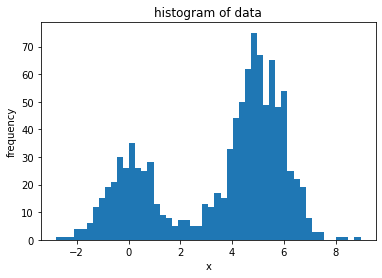

In [27]:
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = X.reshape(N)

plt.hist(X, bins=50)
plt.title('histogram of data')
plt.xlabel('x')
plt.ylabel('frequency')
plt.show()

In [35]:
def kde(bandwith: float, data, kernel):
    mixture = np.zeros(N)
    points = np.linspace(min(data), max(data), N)    
    for xi in data:
        mixture += kernel(points, xi, bandwith)

    return mixture

In [36]:
def gaussian(x, xi: float, bandwith: float):
    exp_section = np.exp(-0.5 * np.power((x - xi)/bandwith, 2.0))    
    return exp_section / (bandwith * np.power(2* np.pi, 0.5))

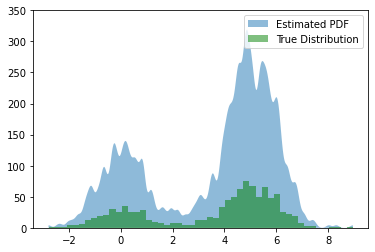

In [37]:
points = kde(0.1, X, gaussian)

plt.fill_between(np.linspace(min(X), max(X), 1000), 
                 points, alpha=0.5, label='Estimated PDF')
plt.hist(X, bins=50, 
         alpha=0.5, color='green', label='True Distribution')
plt.legend(loc='upper right')
plt.ylim(top=350)
plt.show()

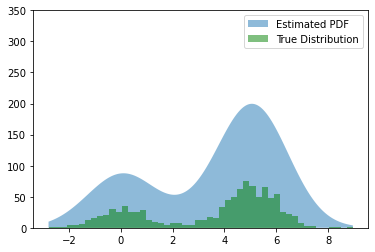

In [38]:
points = kde(1, X, gaussian)

plt.fill_between(np.linspace(min(X), max(X), 1000), 
                 points, alpha=0.5, label='Estimated PDF')
plt.hist(X, bins=50, 
         alpha=0.5, color='green', label='True Distribution')
plt.legend(loc='upper right')
plt.ylim(top=350)
plt.show()

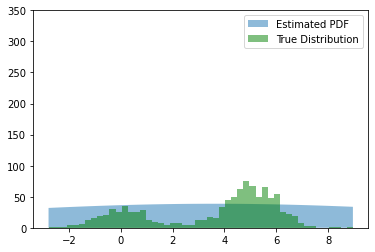

In [39]:
points = kde(10, X, gaussian)

plt.fill_between(np.linspace(min(X), max(X), 1000), 
                 points, alpha=0.5, label='Estimated PDF')
plt.hist(X, bins=50, 
         alpha=0.5, color='green', label='True Distribution')
plt.legend(loc='upper right')
plt.ylim(top=350)
plt.show()